In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-4,4,500)       
y = x + np.random.standard_normal(500)+2.5

In [3]:
x_orig = np.array([61789, 22899, 68500, 54000, 65674, 60949, 93000, 48235, 76025, 67000, 97500, 74000, 63060, 82029, 84000, 144500, 89000, 166800, 114800, 176000, 185530, 150500, 139800, 240000])
y_orig = np.array([8290, 7990, 7990, 7990, 7555, 7490, 6990, 6900, 6900, 6800, 6800, 6600, 6390, 6390, 6200, 5999, 5990, 5800, 5350, 5250, 4450, 4400, 3800, 3650])



In [4]:
x = np.array([1.00, 0.54, 0.59, 0.75, 0.71, 0.42, 0.66, 0.30, 0.56, 0.28, 0.27, 0.18, 0.24, 0.34, 0.20, 0.24, 0.12, 0.32, 0.18, 0.20, 0.14, 0.21, 0.00, 0.18])
y = np.array([0.00, 0.03, 0.16, 0.17, 0.34, 0.37, 0.46, 0.50, 0.51, 0.55, 0.59, 0.59, 0.64, 0.68, 0.68, 0.70, 0.70, 0.72, 0.83, 0.84, 0.94, 0.94, 0.94, 1.00])


In [5]:
y

array([0.  , 0.03, 0.16, 0.17, 0.34, 0.37, 0.46, 0.5 , 0.51, 0.55, 0.59,
       0.59, 0.64, 0.68, 0.68, 0.7 , 0.7 , 0.72, 0.83, 0.84, 0.94, 0.94,
       0.94, 1.  ])

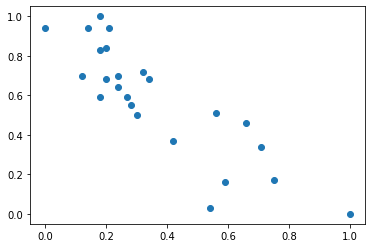

In [6]:
plt.plot(x, y, 'o')
plt.show()

In [7]:
def cost(X, Y, theta):
    J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
    return J

def cost_2(Y, error):
    J = (error.T).dot(error)/(2*len(Y))
#     print(J)
    return J


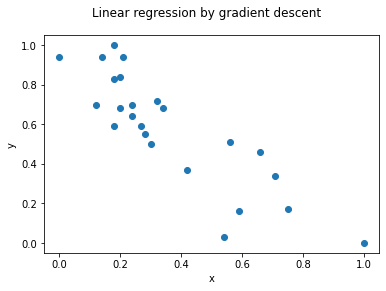

[[0.23268144]
 [0.05444375]]


In [8]:
# In this solution calculation of a variable (b) fails.
# the value is extremely high and that leads wrong result.


plt.plot(x, y, 'o')

alpha = 0.1 # Specify the learning rate
theta =  np.array([[0,0]]).T # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 5
cost_history=[]
theta_history=[]
for i in range(num_iters):
    a=np.sum(theta[0] - alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
    b=np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
    theta= np.array([[a],[b]])
    cost_history.append(cost(X,Y,theta))
    theta_history.append(theta)
    if i in (1,3,7,10,14,num_iters):
#         plt.plot(x, a+x*b)
        plt.suptitle('Linear regression by gradient descent')
        plt.xlabel('x')
        plt.ylabel('y')
plt.show()
print(theta)

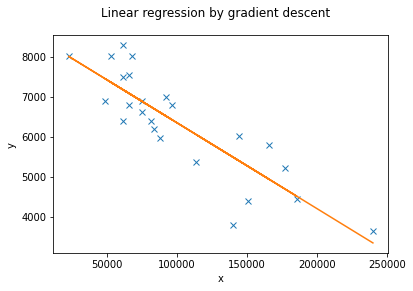

[[ 8.01338092e+03]
 [-1.00686114e+00]]


In [25]:
min_x = np.min(x_orig)
max_x = np.max(x_orig)
min_y = np.min(y_orig)
max_y = np.max(y_orig)
value_range_x = max_x - min_x
value_range_y = max_y - min_y

plt.plot(min_x + x * value_range_x, min_y + y * value_range_y, 'x')

alpha = 0.1 # Specify the learning rate
theta =  np.array([[0.0,-0.0]]).T # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 10000
cost_history=[]
theta_history=[]
# plt.plot(min_x + x * value_range_x, min_y + (theta[0] + x * theta[1]) * value_range_y)
for i in range(num_iters):
    predicted_Y = X.dot(theta)
#     print(predicted_Y.T)
    error = predicted_Y - Y
#     print(error.T)
#     print(np.sum(error))
    a = (theta[0] - alpha * (1/len(Y)) * np.sum(error)).item()
    b = (theta[1] - alpha * (1/len(Y)) * np.sum(X_1.dot(error))).item()
#     print("A: " + str(a))
#     print("B: " + str(b))
    cost_history.append(cost_2(Y, error))
    theta_history.append(theta)
    theta = np.array([[a],[b]])
#     if i in (11000, 11100, num_iters - 1):
#         plt.plot(min_x + x * value_range_x, min_y + (a+x*b) * value_range_y)
#     elif i in range(11000, num_iters, 1000):
#         plt.plot(min_x + x * value_range_x, min_y + (a+x*b) * value_range_y)
plt.plot(min_x + x * value_range_x, min_y + (theta[0] + x * theta[1]) * value_range_y)
plt.suptitle('Linear regression by gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta[0] = min_y + theta[0].dot(value_range_y)
print(theta)

# -0.400 0.015 -0.029 -0.174 -0.135 0.119 -0.097 0.226 -0.004 0.247
#  0.255 0.334  0.288  0.191  0.317 0.280  0.395 0.209  0.342 0.323
#  0.371 0.311 0.500 0.339

# -0.400 -0.031 -0.070 -0.199 -0.164 0.061 -0.130 0.156 -0.048 0.175
#  0.182 0.252 0.212 0.125 0.237 0.204 0.307 0.142 0.260 0.242
#  0.285 0.232 0.400 0.257


# response_variable:
# -0.400 -0.031 -0.070 -0.199 -0.164 0.061 -0.130 0.156 -0.048 0.175
#  0.182 0.252 0.212 0.125 0.237 0.204 0.307 0.142 0.260 0.242
#  0.285 0.232 0.400 0.257

# Error:
# -0.400 -0.063 -0.232 -0.372 -0.509 -0.305 -0.594 -0.348 -0.554 -0.375
# -0.408 -0.339 -0.424 -0.554 -0.441 -0.496 -0.394 -0.578 -0.568 -0.599
# -0.650 -0.703 -0.535 -0.743


In [10]:
print(Y)
print(y)
print(Y.T)
print(theta)


[[0.  ]
 [0.03]
 [0.16]
 [0.17]
 [0.34]
 [0.37]
 [0.46]
 [0.5 ]
 [0.51]
 [0.55]
 [0.59]
 [0.59]
 [0.64]
 [0.68]
 [0.68]
 [0.7 ]
 [0.7 ]
 [0.72]
 [0.83]
 [0.84]
 [0.94]
 [0.94]
 [0.94]
 [1.  ]]
[0.   0.03 0.16 0.17 0.34 0.37 0.46 0.5  0.51 0.55 0.59 0.59 0.64 0.68
 0.68 0.7  0.7  0.72 0.83 0.84 0.94 0.94 0.94 1.  ]
[[0.   0.03 0.16 0.17 0.34 0.37 0.46 0.5  0.51 0.55 0.59 0.59 0.64 0.68
  0.68 0.7  0.7  0.72 0.83 0.84 0.94 0.94 0.94 1.  ]]
[[ 7.66824000e+03]
 [-6.44143333e-01]]


In [17]:
test = np.array([[1],[2],[3],[4]])

In [21]:
np.power(test, 2) / 2

array([[0.5],
       [2. ],
       [4.5],
       [8. ]])

In [20]:
test

array([[1],
       [2],
       [3],
       [4]])

In [17]:
np.sum([[1,2],[3,4]])

10